In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Display the first few rows of the dataset to confirm successful loading
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nyka_top_brands_cosmetics_product_reviews.csv')
print(df.head())

   product_id brand_name  review_id                         review_title  \
0      781070       Olay   16752142                 Worth buying 50g one   
1      781070       Olay   14682550           Best cream to start ur day   
2      781070       Olay   15618995  perfect for summers dry for winters   
3      781070       Olay   13474509                    Not a moisturizer   
4      781070       Olay   16338982                              Average   

                                         review_text          author  \
0  Works as it claims. Could see the difference f...   Ashton Dsouza   
1  It does what it claims . Best thing is it smoo...    Amrit Neelam   
2  I have been using this product for months now....    Sanchi Gupta   
3  i have an oily skin, while this whip acts as a...      Ruchi Shah   
4  It's not that good. Please refresh try for oth...  Sukanya Sarkar   

        review_date  review_rating  is_a_buyer  pro_user    review_label  \
0  23-01-2021 15:17            5.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [4]:
# Handle missing values in review_text and review_rating
df_final = df.copy()

# Drop rows where review_text is missing since it is the core feature
df_final.dropna(subset=['review_text'], inplace=True)

# Drop the single missing review_rating entry
df_final.dropna(subset=['review_rating'], inplace=True)

# Reset index after dropping rows
df_final.reset_index(drop=True, inplace=True)
df_final.head(20)


,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,23-01-2021 15:17,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,07-09-2020 15:30,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,13-11-2020 12:24,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,14-06-2020 11:56,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,22-12-2020 15:24,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
5,781070,Olay,14549640,not good for oily skin,dz product z best for dry skin ...one of olay ...,Laxmi Basumatary,27-08-2020 18:16,1.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
6,739418,Olay,16531371,All time favorite,"This cream is just awesome, It makes my rough ...",Priyanka Barwal,06-01-2021 15:43,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
7,739418,Olay,21356560,"""Good Product """,Instantly perfect skin tone appearance.,Bandana Mukherjee,13-11-2021 19:57,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
8,739418,Olay,15235570,Good eye cream combo,This eye cream combo is effective. Works on fi...,krish,19-10-2020 15:08,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...
9,739418,Olay,22008691,"""Olay''","3in1 benifits, helps reduces dark spots and wr...",Gargi Mukherjee,16-12-2021 14:55,5.0,False,False,NaN,Olay Regenerist Whip Mini and Ultimate Eye Cre...,2198,1943,4.0,792,NaN,https://www.nykaa.com/olay-regenerist-whip-min...


In [5]:
#import necessary libararies for Pre-Processing Steps and Machine Learning
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Step 1: Preprocessing
# Function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function
df_final['cleaned_review'] = df_final['review_text'].apply(clean_text)

In [7]:
# Convert ratings into sentiment labels
def assign_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating == 3.0:
        return "Neutral"
    else:
        return "Negative"

df_final['sentiment'] = df_final['review_rating'].apply(assign_sentiment)

In [8]:
# Reduce dataset size for faster training (sample 20,000 rows while maintaining class balance)
df_sampled = df_final.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=6666, random_state=42) if len(x) > 6666 else x)

# Update sampling method to avoid the DeprecationWarning
df_sampled = df_final.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 6666), random_state=42)).reset_index(drop=True)

# Verify class distribution after sampling
df_sampled['sentiment'].value_counts()


<ipython-input-8-a424e8649ec6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_final.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=6666, random_state=42) if len(x) > 6666 else x)
<ipython-input-8-a424e8649ec6>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_final.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 6666), random_

,count
sentiment,
Positive,6666
Negative,4795
Neutral,3540


In [9]:
# Train-Test Split using the sampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    df_sampled['cleaned_review'], df_sampled['sentiment'], test_size=0.2, random_state=42, stratify=df_sampled['sentiment']
)

In [10]:
# Apply TF-IDF with optimized features for faster training
tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf_sampled = tfidf_vectorizer.fit_transform(X_train_sampled)
X_test_tfidf_sampled = tfidf_vectorizer.transform(X_test_sampled)

In [11]:
# Encode sentiment labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded_sampled = label_encoder.fit_transform(y_train_sampled)
y_test_encoded_sampled = label_encoder.transform(y_test_sampled)

In [12]:
# Define optimized models for faster execution
optimized_models = {
    "Logistic Regression": LogisticRegression(C=1, class_weight='balanced', random_state=42, max_iter=300, solver="saga"),
    "SVM": SVC(C=1, kernel="linear", class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [13]:
# Train and evaluate each model with optimized settings
results_optimized_fast = {}
y_pred_proba_optimized_fast = {}  # Store probability scores for ROC Curve

for name, model in optimized_models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_tfidf_sampled, y_train_encoded_sampled)

    # Predict on test set
    y_pred = model.predict(X_test_tfidf_sampled)
    y_pred_proba_optimized_fast[name] = model.predict_proba(X_test_tfidf_sampled) if hasattr(model, "predict_proba") else None

    # Evaluate the model
    report = classification_report(y_test_encoded_sampled, y_pred, output_dict=True)
    results_optimized_fast[name] = report

# Convert results to a DataFrame for better visualization
results_optimized_fast_df = pd.DataFrame(results_optimized_fast).T

# Display the classification report for all models
results_optimized_fast_df

Training Logistic Regression...
Training SVM...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,0,1,2,accuracy,macro avg,weighted avg
Logistic Regression,"{'precision': 0.7703862660944206, 'recall': 0....","{'precision': 0.529113924050633, 'recall': 0.5...","{'precision': 0.8631743549648163, 'recall': 0....",0.746418,"{'precision': 0.7208915150366234, 'recall': 0....","{'precision': 0.7547109886489378, 'recall': 0...."
SVM,"{'precision': 0.7667386609071274, 'recall': 0....","{'precision': 0.5154130702836005, 'recall': 0....","{'precision': 0.8591772151898734, 'recall': 0....",0.737754,"{'precision': 0.7137763154602004, 'recall': 0....","{'precision': 0.7485362328004049, 'recall': 0...."
Random Forest,"{'precision': 0.757162346521146, 'recall': 0.5...","{'precision': 0.5, 'recall': 0.528248587570621...","{'precision': 0.7355263157894737, 'recall': 0....",0.682106,"{'precision': 0.66422955410354, 'recall': 0.64...","{'precision': 0.6868746403122082, 'recall': 0...."
XGBoost,"{'precision': 0.7149270482603816, 'recall': 0....","{'precision': 0.5641547861507128, 'recall': 0....","{'precision': 0.727609635577517, 'recall': 0.8...",0.697101,"{'precision': 0.6688971566628705, 'recall': 0....","{'precision': 0.6849942958136682, 'recall': 0...."


Evaluating Logistic Regression...


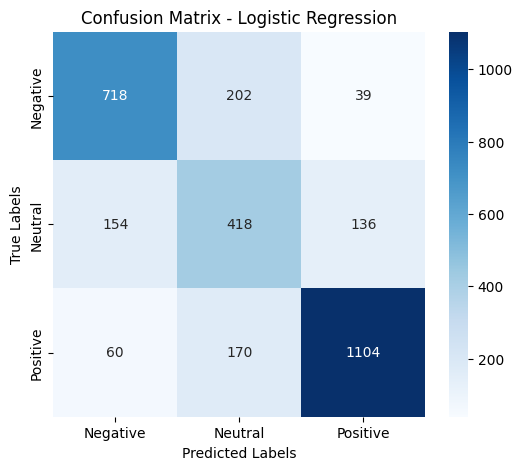

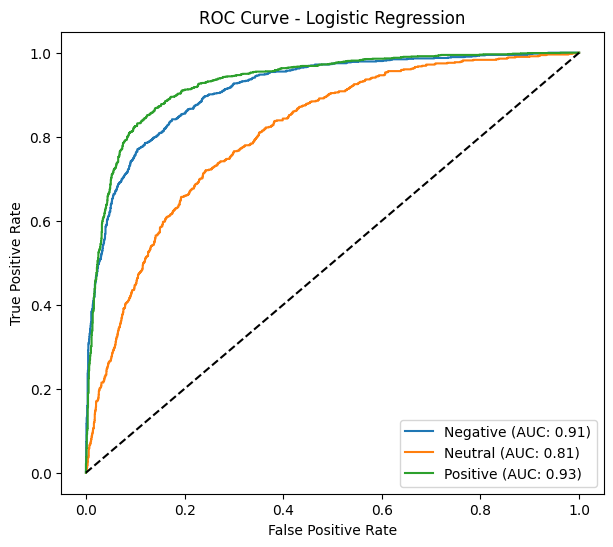

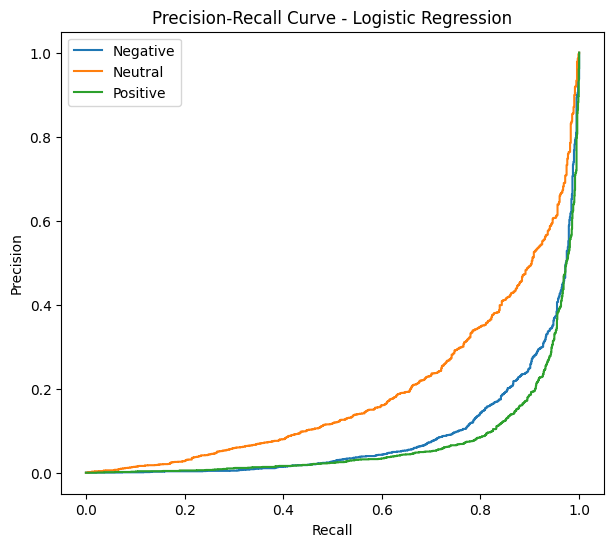

Evaluating SVM...


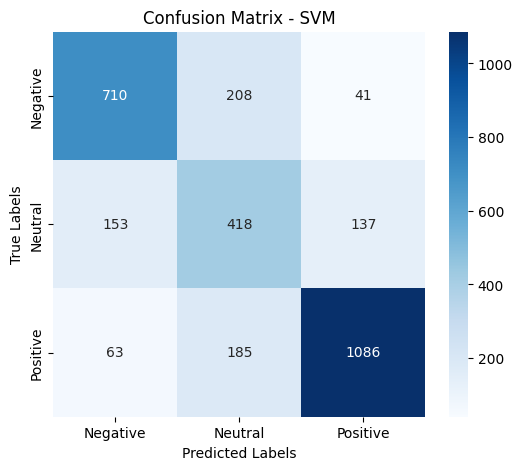

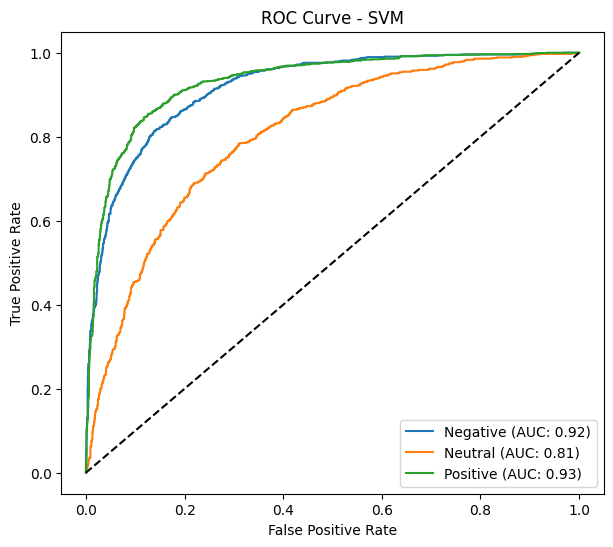

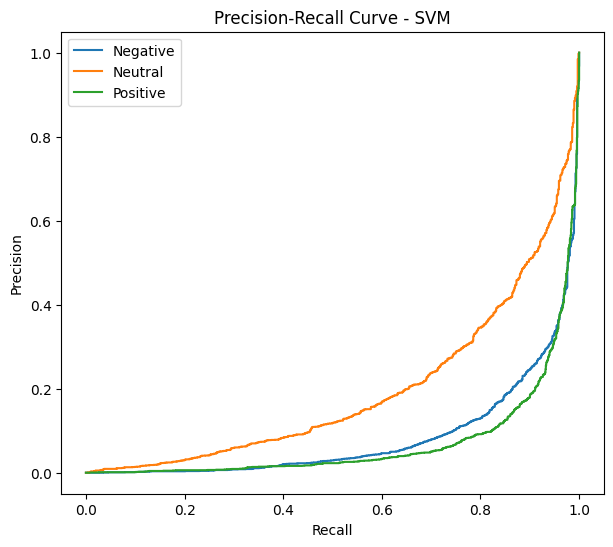

Evaluating Random Forest...


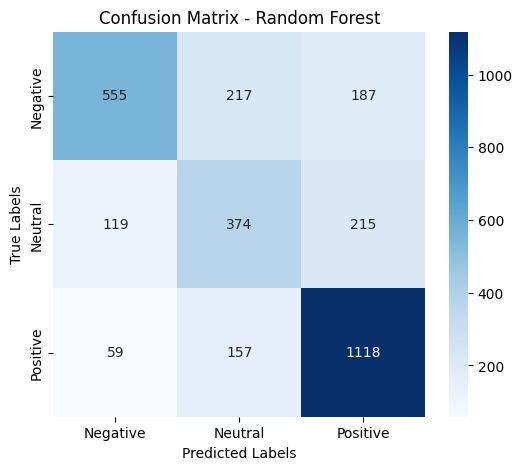

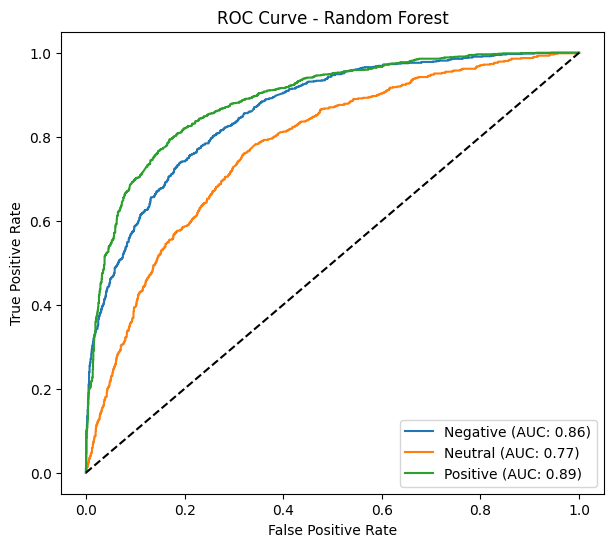

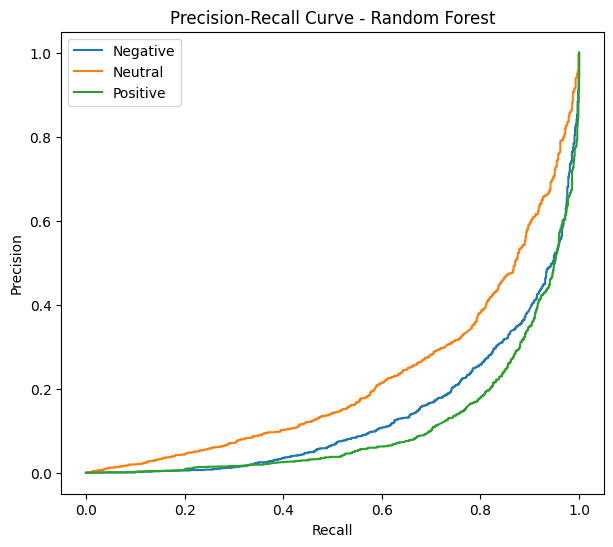

Evaluating XGBoost...


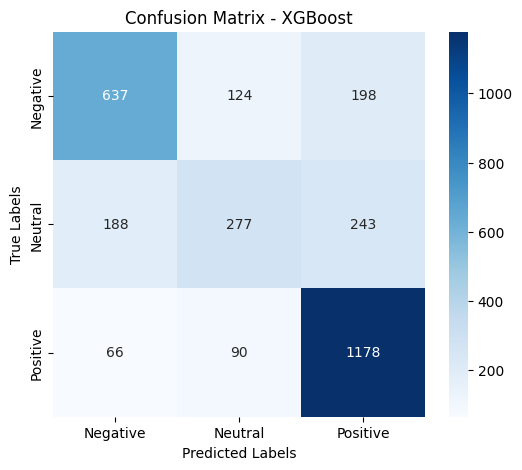

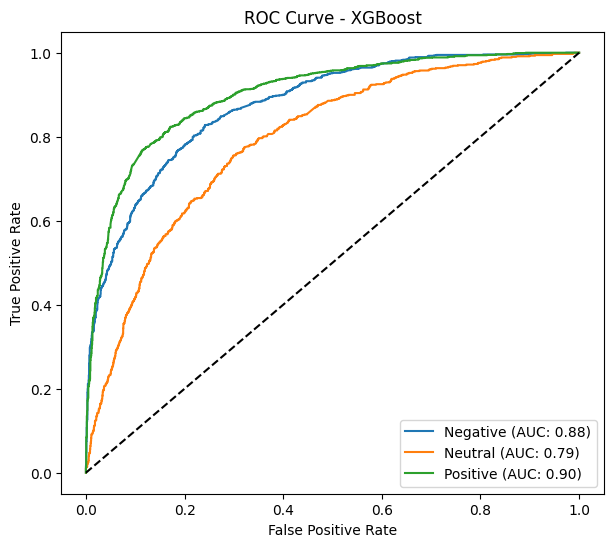

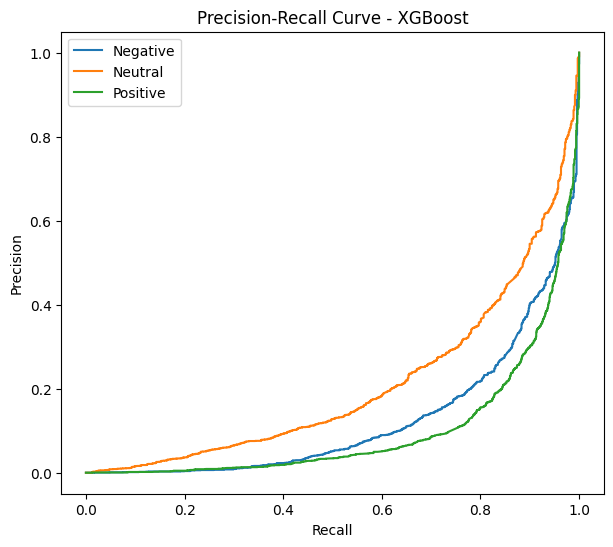

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    plt.figure(figsize=(7, 6))
    for i, class_label in enumerate(label_encoder.classes_):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"{class_label} (AUC: {auc(fpr, tpr):.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall(y_true, y_pred_proba, model_name):
    plt.figure(figsize=(7, 6))
    for i, class_label in enumerate(label_encoder.classes_):
        precision, recall, _ = roc_curve(y_true == i, y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{class_label}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend()
    plt.show()

# Generate visualizations for each model
for model_name, model in optimized_models.items():
    print(f"Evaluating {model_name}...")

    # Predictions
    y_pred = model.predict(X_test_tfidf_sampled)

    # Plot confusion matrix
    plot_confusion_matrix(y_test_encoded_sampled, y_pred, model_name)

    # Plot ROC and Precision-Recall curves if probability predictions are available
    if model_name in y_pred_proba_optimized_fast and y_pred_proba_optimized_fast[model_name] is not None:
        plot_roc_curve(y_test_encoded_sampled, y_pred_proba_optimized_fast[model_name], model_name)
        plot_precision_recall(y_test_encoded_sampled, y_pred_proba_optimized_fast[model_name], model_name)

In [15]:
#pip install transformers datasets torch

In [16]:
# Import necessary libraries for BERT
from transformers import BertTokenizer
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare data for Hugging Face
df_bert = df_sampled[['cleaned_review', 'sentiment']].copy()

# Map sentiment to numerical labels for BERT
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_bert['label'] = df_bert['sentiment'].map(label_mapping)

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_bert['cleaned_review'], df_bert['label'], test_size=0.2, random_state=42, stratify=df_bert['label']
)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})

# Tokenization function for BERT
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

# Tokenize datasets
train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

# Verify tokenized dataset structure
train_tokenized[0]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3001 [00:00<?, ? examples/s]

{'text': 'nice fragrance but i noticed light hairfall',
 'label': 1,
 'input_ids': [101,
  3835,
  24980,
  2021,
  1045,
  4384,
  2422,
  2606,
  13976,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [17]:
# Import necessary libraries for BERT fine-tuning
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load pretrained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none"  # Disables wandb and other integrations
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
)

# Train the BERT model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-3e3c9d833dc0>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.633900,0.551503
2,0.439100,0.552777
3,0.499700,0.592583


TrainOutput(global_step=2250, training_loss=0.4962438989215427, metrics={'train_runtime': 930.2923, 'train_samples_per_second': 38.698, 'train_steps_per_second': 2.419, 'total_flos': 2368020759552000.0, 'train_loss': 0.4962438989215427, 'epoch': 3.0})

In [18]:
# Import necessary evaluation libraries
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using BERT
bert_predictions = trainer.predict(test_tokenized)

# Convert logits to predicted labels
bert_preds = bert_predictions.predictions.argmax(axis=-1)

# Convert labels back to original sentiment classes
y_test_labels = test_labels.tolist()

# Evaluate BERT model performance
bert_accuracy = accuracy_score(y_test_labels, bert_preds)
bert_classification_report = classification_report(y_test_labels, bert_preds, target_names=label_mapping.keys())

# Display evaluation metrics
print(f"✅ **BERT Model Accuracy:** {bert_accuracy:.4f}")
print("\n📊 **BERT Classification Report:**")
print(bert_classification_report)

✅ **BERT Model Accuracy:** 0.7771

📊 **BERT Classification Report:**
              precision    recall  f1-score   support

    Negative       0.83      0.77      0.80       959
     Neutral       0.56      0.56      0.56       708
    Positive       0.86      0.90      0.88      1334

    accuracy                           0.78      3001
   macro avg       0.75      0.74      0.74      3001
weighted avg       0.78      0.78      0.78      3001



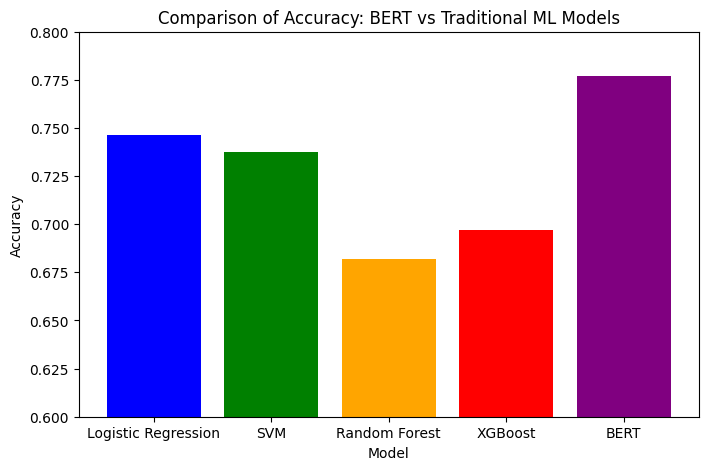

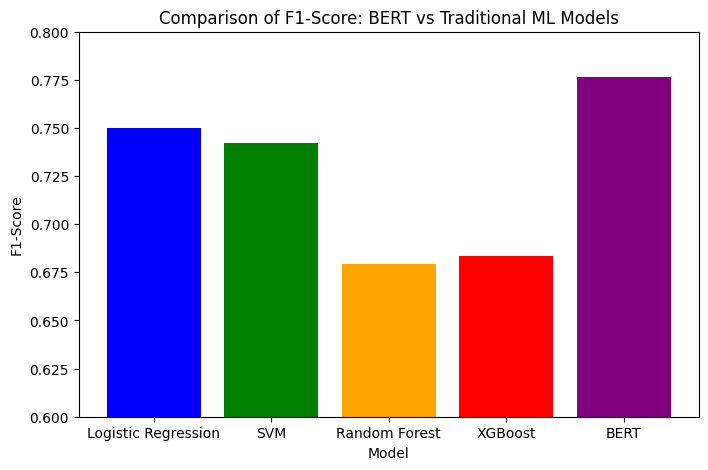

In [19]:
# Extract accuracy scores from traditional ML models
ml_accuracies = {
    "Logistic Regression": results_optimized_fast["Logistic Regression"]["accuracy"],
    "SVM": results_optimized_fast["SVM"]["accuracy"],
    "Random Forest": results_optimized_fast["Random Forest"]["accuracy"],
    "XGBoost": results_optimized_fast["XGBoost"]["accuracy"],
    "BERT": bert_accuracy  # BERT's accuracy from evaluation
}

# Extract F1-scores from traditional ML models
ml_f1_scores = {
    "Logistic Regression": results_optimized_fast["Logistic Regression"]["weighted avg"]["f1-score"],
    "SVM": results_optimized_fast["SVM"]["weighted avg"]["f1-score"],
    "Random Forest": results_optimized_fast["Random Forest"]["weighted avg"]["f1-score"],
    "XGBoost": results_optimized_fast["XGBoost"]["weighted avg"]["f1-score"],
    "BERT": classification_report(y_test_labels, bert_preds, output_dict=True)["weighted avg"]["f1-score"]
}

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(ml_accuracies.keys(), ml_accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Comparison of Accuracy: BERT vs Traditional ML Models")
plt.ylim(0.6, 0.8)
plt.show()

# Plot F1-score comparison
plt.figure(figsize=(8, 5))
plt.bar(ml_f1_scores.keys(), ml_f1_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.title("Comparison of F1-Score: BERT vs Traditional ML Models")
plt.ylim(0.6, 0.8)
plt.show()


In [20]:
pip install torch

In [21]:
# Import necessary libraries for attention visualization
import torch
from transformers import BertModel

# Load pre-trained BERT model
bert_model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Function to extract attention scores for a given text
def get_attention_scores(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.attentions

# Sample reviews for visualization
sample_reviews = [
    "This product is absolutely amazing, I love it!",  # Positive
    "The quality is okay, nothing too special.",       # Neutral
    "Very disappointing, not worth the money."        # Negative
]

# Extract attention scores for each review
attention_results = {text: get_attention_scores(text) for text in sample_reviews}

# Display sample attention outputs
attention_results


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


{'This product is absolutely amazing, I love it!': (tensor([[[[6.2249e-02, 1.0997e-01, 4.5874e-02,  ..., 1.0422e-01,
             4.8175e-02, 3.3373e-01],
            [1.4231e-01, 2.9028e-02, 4.9767e-02,  ..., 3.6577e-02,
             1.8479e-01, 5.5852e-02],
            [4.7221e-02, 5.7352e-02, 4.3068e-02,  ..., 5.8315e-02,
             1.4443e-01, 3.2975e-02],
            ...,
            [7.6131e-02, 5.0083e-02, 6.7776e-02,  ..., 4.0440e-02,
             1.7293e-01, 7.9647e-02],
            [4.8275e-02, 6.3009e-02, 4.9763e-02,  ..., 5.1535e-02,
             8.4314e-02, 1.6806e-01],
            [7.9737e-02, 1.0952e-01, 4.1001e-02,  ..., 9.1413e-02,
             1.1484e-01, 1.1208e-01]],
  
           [[3.7097e-01, 4.1553e-03, 4.7042e-03,  ..., 7.3359e-03,
             4.9978e-03, 3.6463e-03],
            [4.8550e-03, 8.2711e-03, 5.3936e-02,  ..., 1.2455e-02,
             4.0945e-02, 2.0688e-02],
            [4.4485e-02, 1.4063e-02, 9.8482e-02,  ..., 2.0310e-02,
             1.0373e-0

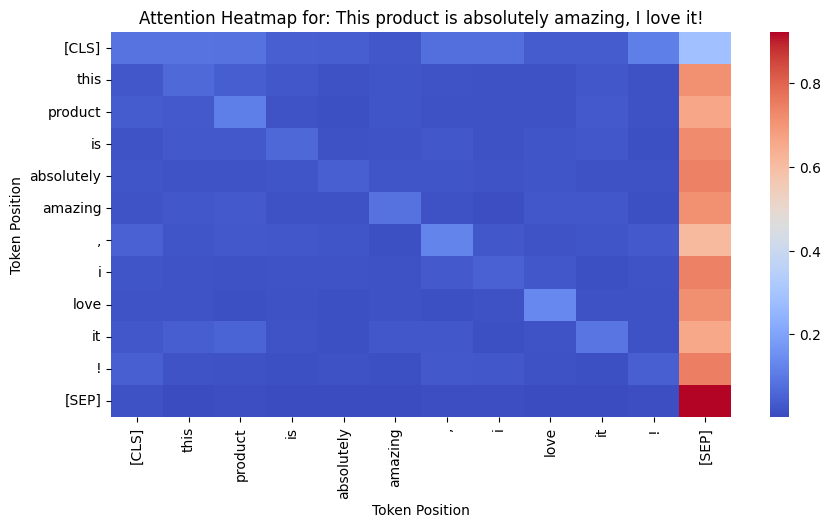

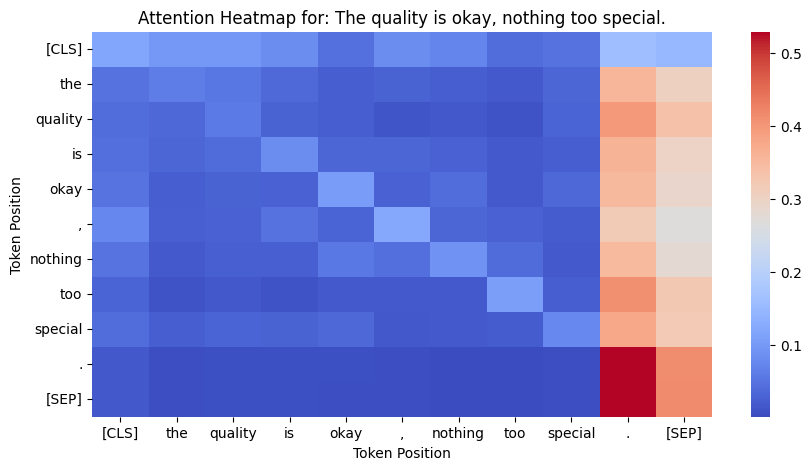

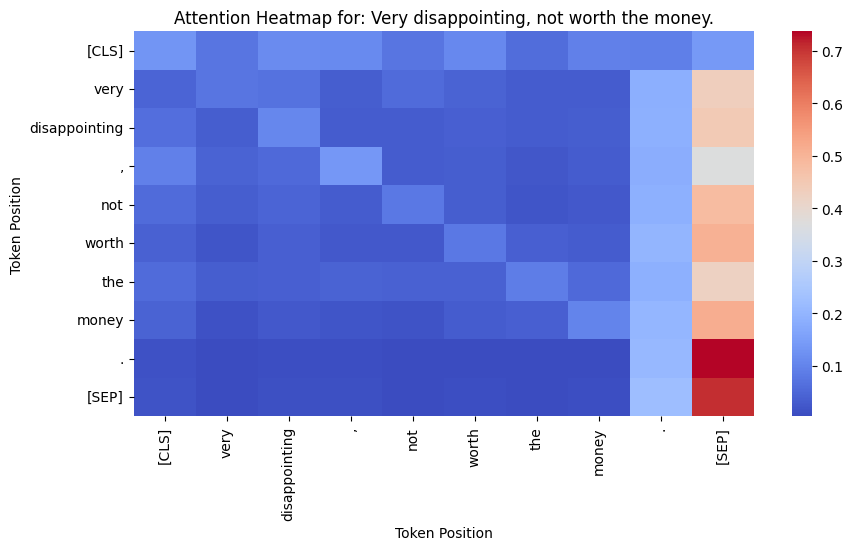

In [22]:
# Import necessary libraries for visualization
import numpy as np
import seaborn as sns

# Function to visualize attention heatmap for a given text
def visualize_attention(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)

    attention = outputs.attentions[-1]  # Last layer's attention
    attention = attention.squeeze(0).mean(dim=0).numpy()  # Average attention across all heads

    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

    # Create heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=False)
    plt.title(f"Attention Heatmap for: {text}")
    plt.xlabel("Token Position")
    plt.ylabel("Token Position")
    plt.show()

# Visualizing attention heatmap for each review
for review in sample_reviews:
    visualize_attention(review)


In [24]:
pip install ace_tools

<ipython-input-29-85e429ed4150>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="coolwarm")


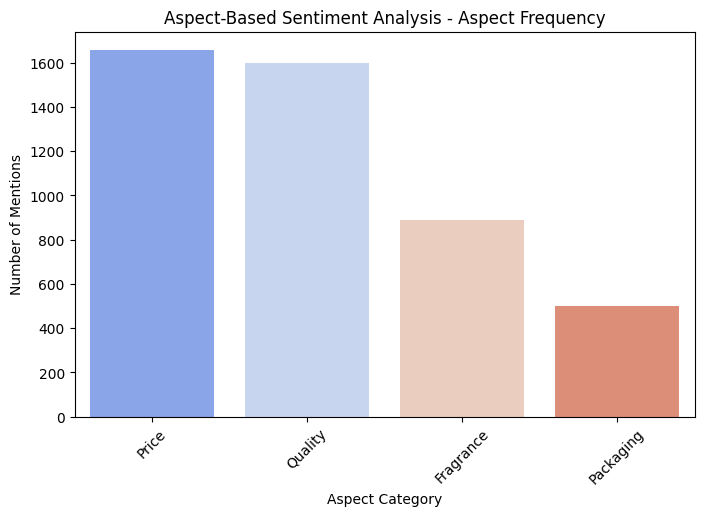

In [29]:
# Import necessary libraries for Aspect-Based Sentiment Analysis (ASBA)
import spacy
from collections import defaultdict

# Load English NLP model for aspect extraction
nlp = spacy.load("en_core_web_sm")

# Define sample aspect categories (can be expanded)
aspect_keywords = {
    "Quality": ["quality", "texture", "durability", "lasting"],
    "Price": ["price", "cost", "expensive", "cheap", "worth"],
    "Fragrance": ["fragrance", "smell", "scent", "aroma"],
    "Packaging": ["packaging", "bottle", "box", "container"],
}

# Function to extract aspects from text
def extract_aspects(text):
    aspects_found = []
    doc = nlp(text)
    for token in doc:
        for aspect, keywords in aspect_keywords.items():
            if token.text.lower() in keywords:
                aspects_found.append(aspect)
    return aspects_found

# Apply aspect extraction on dataset
df_sampled["aspects"] = df_sampled["cleaned_review"].apply(extract_aspects)

# Filter reviews that mention at least one aspect
df_aspect_reviews = df_sampled[df_sampled["aspects"].apply(len) > 0]


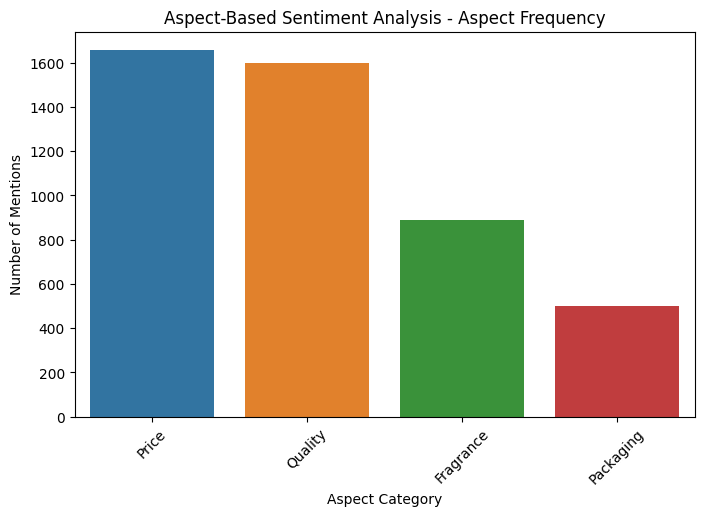

In [30]:
# Fix Seaborn warning by explicitly setting hue and legend
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each aspect
aspect_counts = df_aspect_reviews["aspects"].explode().value_counts()

# Plot aspect frequency with updated syntax
plt.figure(figsize=(8, 5))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values, hue=aspect_counts.index, dodge=False, legend=False)

plt.xlabel("Aspect Category")
plt.ylabel("Number of Mentions")
plt.title("Aspect-Based Sentiment Analysis - Aspect Frequency")
plt.xticks(rotation=45)
plt.show()
